<a href="https://colab.research.google.com/github/andresit02/M-TODOS-NUM-RICOS---TAREA-7/blob/main/Tarea_07_Unidad_03_B_%7C_splines_c%C3%BAbicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESCUELA POLITÉCNICA NACIONAL**

**MÉTODOS NUMÉRICOS**

**[Tarea 07] Unidad 03-B | splines cúbicos**

**Realizado por: Andres Patricio Fernandez Obaco**

#**EJERCICIO 1**

Dados los puntos (0,1), (1,5), (2,3), determine el spline cúbico.

**$S_0(x)=a_0+b_0(x-x_0)+c_0(x-x_0)^2+d_0(x-x_0)^3$**

**$S_1(x)=a_1+b_1(x-x_0)+c_1(x-x_0)^2+d_1(x-x_0)^3$**

**Ecuaciones:**

- $a_0=1$
- $c_0=0$
- $a_0=1$
- $b_0+d_0=4$
- $a_1=5$
- $b_1+c_1+d_1=-2$

**Valores:**

- $b_0=5$
- $b_1=2$
- $d_1=-1$
- $c_1=-3$

**Ecuaciones Splines Cubicos:**

- $S_0(x)=1+5x-x^2$
- $5+2(x+1)-3(x-1)^2-(x-1)^3$

#**EJERCICIO 2**

Dados los puntos (-1,1), (1,3), determine el spline cúbico sabiendo que $𝑓′(𝑥_0) = 1, 𝑓′(𝑥_𝑛) = 2$

**$S(x)=a+b(x-1)+c(x-1)^2+d(x-1)^3$**

**Condiciones:**

- $𝑓′(𝑥_0) = 1$
- $𝑓′(𝑥_𝑛) = 2$
- $S(x_0)=a=1$
- $b+2c+4d=1$
- $S'(x_0)=b=1$
- $c+3d=0.25$

**Valores:**

- $a=1$
- $b=1$
- $c=-0.5$
- $d=0.25$

**Ecuaciones Splines Cubicos:**

- $7/4+1/4x^3+1/4x^2+3/4x$

#**EJERCICIO 3**
Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:

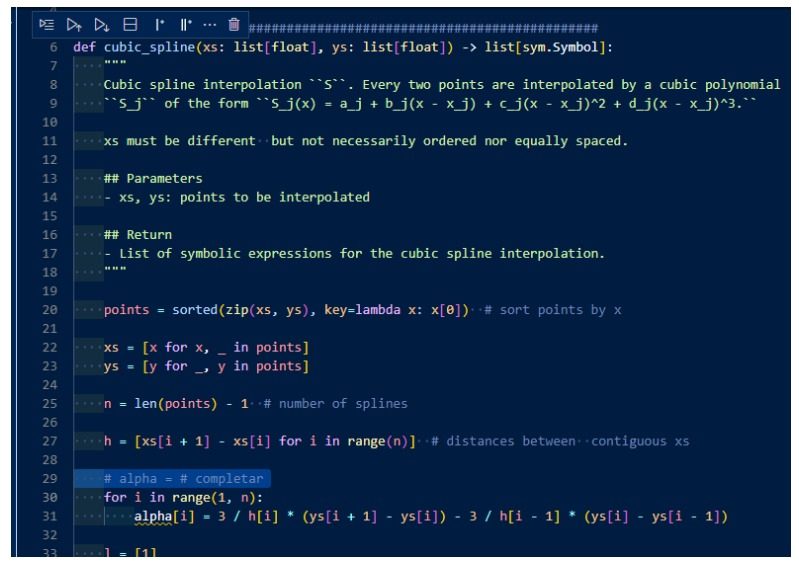

In [2]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Interpolación de splines cúbicos ``S``. Cada dos puntos son interpolados por un polinomio cúbico
    ``S_j`` de la forma ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs deben ser diferentes pero no necesariamente ordenados ni igualmente espaciados.

    ## Parámetros
    - xs, ys: puntos a interpolar

    ## Retorno
    - Lista de expresiones simbólicas para la interpolación del spline cúbico.
    """

    puntos = sorted(zip(xs, ys), key=lambda x: x[0])  # ordenar puntos por x

    xs = [x for x, _ in puntos]
    ys = [y for _, y in puntos]

    n = len(puntos) - 1  # número de splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distancias entre xs contiguos

    alpha = [0] * (n)  # inicializar alpha
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1] * (n + 1)
    u = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines

# Ejemplo de uso:
xs = [0, 1, 2]
ys = [1, 5, 3]
splines = cubic_spline(xs, ys)
for spline in splines:
    display(spline)

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0